In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('zoo-animal-classification/zoo.csv')

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
X1 = df.drop(['animal_name', 'class_type'], axis=1)
y1 = df['class_type']

In [5]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 14 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8 }
    )

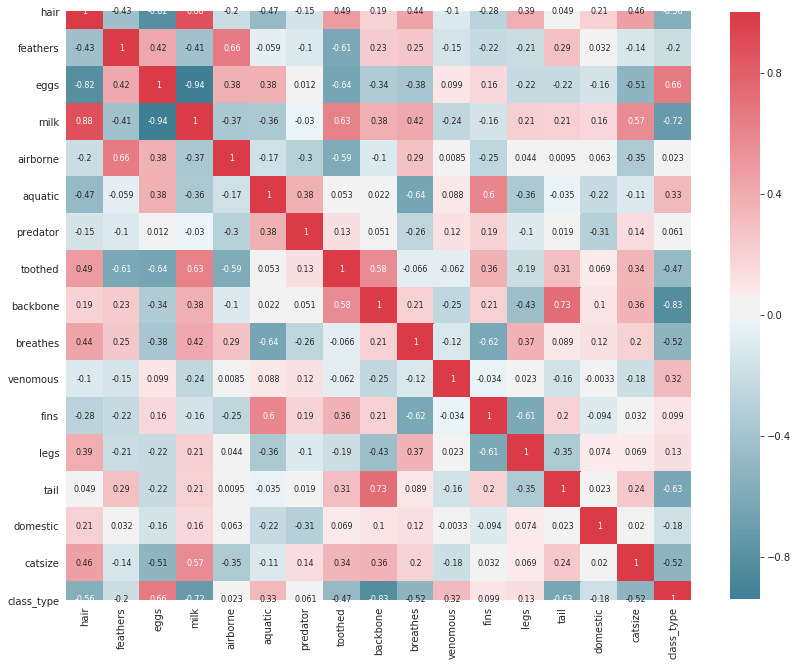

In [6]:
plot_correlation_map(df)

In [7]:
df_corr = df.drop(['animal_name'], axis=1)
df_corr.corr()['class_type'][:]
# Correlation with output variable
cor_target = abs(df_corr.corr()['class_type'][:])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

hair          0.562384
eggs          0.661825
milk          0.723683
backbone      0.828845
breathes      0.519308
tail          0.631830
catsize       0.521030
class_type    1.000000
Name: class_type, dtype: float64

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [10]:
X = df[relevant_features.index]

In [11]:
X = X.drop(['class_type'], axis=1)

In [12]:
X.head()

,hair,eggs,milk,backbone,breathes,tail,catsize
0,1,0,1,1,1,0,1
1,1,0,1,1,1,1,1
2,0,1,0,1,0,1,0
3,1,0,1,1,1,0,1
4,1,0,1,1,1,1,1


In [13]:
y = df['class_type']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
model = KNeighborsClassifier()

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
predictions = model.predict(X_test)

In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8529411764705882


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
a = pd.read_csv('zoo-animal-classification/class.csv')

In [24]:
a

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [ ]:
# Create a dictionary object to capture set aside code and it's score
class scores(dict):  
  
    # __init__ function  
    def __init__(self):  
        self = dict()  
          
    # Function to add key:value  
    def add(self, key, value):  
        self[key] = value  

scores = scores()
percent = ''
class_types = df['class_type'].unique()

dfNew = df.drop(['animal_name'], axis=1)

# Loop through each set aside, test it, and append to the dictionary
for class_type in class_types:
    dataPoint = dfNew.loc[dfNew['class_type'] == class_type]
    XPoint = dataPoint.drop(["class_type"],axis=1)
    yPoint = dataPoint["class_type"]
    percent = model.score(XPoint, yPoint)
    percent = round(percent, 4)
    scores.add(class_type, percent)
    
    # Sort the dictionary by score
import operator
sortedScores = sorted(scores.items(), key=operator.itemgetter(1))

# Print scores
for score in reversed(sortedScores):
    print("{:<8} {:.2%}".format(score[0], score[1]))

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.43      1.00      0.60         3
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3

    accuracy                           0.85        34
   macro avg       0.59      0.67      0.60        34
weighted avg       0.81      0.85      0.82        34



In [26]:
print(confusion_matrix(y_test, predictions))

[[17  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  1  0  0  0  0  2]]


In [27]:
model1 = KNeighborsClassifier()

In [28]:
model1.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
predictions1 = model1.predict(X1_test)

In [30]:
print(confusion_matrix)
print(classification_report(y1_test, predictions1))

<function confusion_matrix at 0x7efbc8044170>
              precision    recall  f1-score   support

           1       0.94      0.88      0.91        17
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.85        34
   macro avg       0.72      0.79      0.73        34
weighted avg       0.83      0.85      0.83        34

